<a href="https://colab.research.google.com/github/aelsir/my-NN-projects/blob/master/my_basic_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
#define our score function

class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, input_dim, output_dim):
    super(MyDenseLayer, self).__init__()

    #initilize weight and biases
    self.W = self.add_weights([input_dim, output_dim])
    self.b = self.add_weights([1, output_dim])

  def call(self, input):
    z = tf.matmul(input, self.W) + self.b

    output = tf.math.sigmoid(z)

    return(output)

    

In [ ]:
#test the tf.matmul function

x = tf.random.uniform(shape=[5, 5], minval=0, maxval=10)
w = tf.random.uniform(shape=[5, 5, 10])
print("the x and it's shape:", x, x.shape)
print("the w and it's shape: ", w, w.shape)

print("the shape of the output is", tf.linalg.matmul(x, w).shape)

the x and it's shape: tf.Tensor(
[[0.91269374 2.111367   9.294629   7.509098   9.034715  ]
 [6.5435624  3.601278   5.7909656  9.340945   2.9895747 ]
 [3.23447    8.96556    9.081969   9.147806   0.9593046 ]
 [0.6537163  4.701102   5.2715216  7.6186094  6.454159  ]
 [2.2335243  7.071229   4.999995   8.581467   4.096423  ]], shape=(5, 5), dtype=float32) (5, 5)
the w and it's shape:  tf.Tensor(
[[[0.8699603  0.16764295 0.8420342  0.2346102  0.7679665  0.34766877
   0.48574424 0.5123366  0.16995335 0.7361424 ]
  [0.4361112  0.31604707 0.5124972  0.9699662  0.79414785 0.9893501
   0.22031724 0.70569885 0.4263755  0.24541783]
  [0.1864773  0.2460593  0.21033978 0.52393866 0.10876679 0.17194986
   0.31096768 0.94412637 0.94789255 0.56380045]
  [0.8363422  0.42604375 0.6021378  0.6755189  0.85621965 0.3593676
   0.2263112  0.42917633 0.46136665 0.39689767]
  [0.8867941  0.00300825 0.17735195 0.34096456 0.918154   0.03931499
   0.87696064 0.24084163 0.10235071 0.37362218]]

 [[0.97726965 0.9006

#1 MODEL, predict the number we write

In [ ]:
#import tensorflow as tf
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print(tfds.list_builders())

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'cos_e', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image

the shape of one training example is:  (28, 28)
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3248 - accuracy: 0.9088
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1663 - accuracy: 0.9517
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1217 - accuracy: 0.9639
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0966 - accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0798 - accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0677 - accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0598 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0464 - accuracy: 0.9853
Epoch 10/10
1875/1875 [===========

<Figure size 432x288 with 0 Axes>

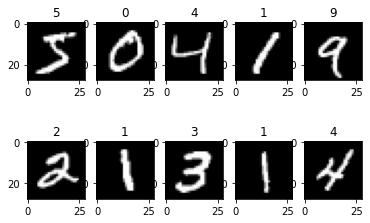

In [ ]:
#import MNIST dataset of numbers to tensorflow and split it into training and testing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('the shape of one training example is: ', x_train[0].shape)

#check the shape or any refindment to the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

#visulize the first 10 images of the dataset with title = lable
plt.figure()
f, axarr = plt.subplots(2,5)
count = 0
for i in range(2):
  for j in range(5):
    axarr[i, j].imshow(x_train[count], cmap='gray')
    axarr[i, j].set_title(y_train[count])
    count += 1

#create a model that have a single hiddlen layers and output layer of 10, and compile the model
num_class = 10
input_shape = 28*28

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(50, activation='relu'),
                             tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#initilize the weight and the bias for our neural network

#fit the training model
model.fit(x_train, y_train, epochs=10)

#calculate the accuracty on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('the accuracy of the model on the test set = ', test_acc)

In [ ]:
import numpy as np

#make prediction 
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

new_img = x_train[1]
new_img = tf.reshape(new_img, shape=[1, 28, 28])
predictions = prob_model.predict(new_img)
print(np.argmax(predictions[0]))
#train our data

#compute the loss of the data 

# optimize the data

0


In [ ]:
import cv2

# read image
img = cv2.imread('the nine.png', cv2.IMREAD_UNCHANGED)
img_tensor = tf.convert_to_tensor(img)
img_tensor = img_tensor / 255
nine_img = tf.reshape(img_tensor, shape=[1, 28, 28])
print('the shape of my new nine image is:', nine_img.shape)
predictionss = prob_model.predict(nine_img)
print(np.argmax(predictionss))



the shape of my new nine image is: (1, 28, 28)


8
